<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nisitha/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os # used to navigate path structure.

In [ ]:
# Avoid out of memory error by setting GPU memory consumption growth.
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
# Mounting the Google Drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data_dir ='/content/drive/MyDrive/dataset for model'

In [ ]:
image_exts = ['jpeg','jpg','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir, image)
    try :
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}', format(image_path))

Issue with image {} /content/drive/MyDrive/dataset for model/Tushar_mone.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/SNP00553.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/20855503-Adult-Russell-s-Viper-Daboia-russelii-Tamil-Nadu-South-India-Stock-Photo.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/File-Daboia_russelii_head_A_Chawla02.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/russells-viper-daboia-russelli-ncbs-bangalore-india-FAJAD9.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/Daboia_siamensis_WN_adult_D8D_5167e.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/Russells-viper-portrait.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/juvenile-russells-viper.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/viper-for-jasmine_img_0518.jpg
Issue with image {} /content/drive/MyDrive/dataset for model/5384077d7fe23.jpg
Issue with image {} /conte

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset for model', image_size=(224,224)) # building the data pipeline

Found 783 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() # allow accessing to the pipeline

In [ ]:
#get another batch
batch = data_iterator.next() # accessing the pipeline

In [ ]:
batch[1]

array([3, 2, 2, 0, 0, 3, 1, 1, 3, 2, 0, 2, 3, 3, 3, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 3, 2, 3, 1, 1, 0, 3], dtype=int32)

In [ ]:
batch[0].shape

(32, 224, 224, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


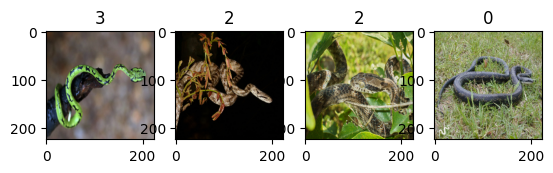

In [ ]:
fig,ax = plt.subplots(ncols = 4)
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

PRE PROCESSING


*Scaling data*

In [ ]:
data = data.map(lambda x,y : (x/255, y)) # x is images and y is target variable

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()[0].max()

1.0

*Split data*

In [ ]:
len(data) #25 batches

25

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size)
print(val_size)
print(test_size)
print(train_size + val_size + test_size)

17
5
3
25


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

**DEEP NEURAL NETWORK MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape =(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu',))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(224, activation = 'relu'))
model.add(Dense(4, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 16)        0

*Test*

In [ ]:
logdir = '/content/drive/MyDrive/Logs for model'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks =[tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 44s 2s/step - loss: -365.4834 - accuracy: 0.2904 - val_loss: -2164.3101 - val_accuracy: 0.1875
Epoch 2/20
17/17 [==============================] - 52s 3s/step - loss: -11405.9160 - accuracy: 0.2849 - val_loss: -46990.0742 - val_accuracy: 0.2812
Epoch 3/20
17/17 [==============================] - 43s 2s/step - loss: -161068.6250 - accuracy: 0.2831 - val_loss: -419949.8438 - val_accuracy: 0.3562
Epoch 4/20
17/17 [==============================] - 42s 2s/step - loss: -1151931.7500 - accuracy: 0.2904 - val_loss: -2714028.7500 - val_accuracy: 0.3125
Epoch 5/20
17/17 [==============================] - 53s 3s/step - loss: -5453912.5000 - accuracy: 0.2923 - val_loss: -12547398.0000 - val_accuracy: 0.3250
Epoch 6/20
17/17 [==============================] - 42s 2s/step - loss: -20958082.0000 - accuracy: 0.3143 - val_loss: -42618624.0000 - val_accuracy: 0.2937
Epoch 7/20
17/17 [==============================] - 42s 2s/step - loss: -52501068.0000

*Plot Performance*

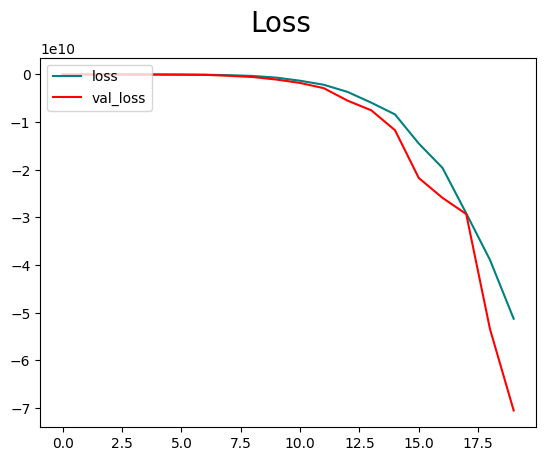

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

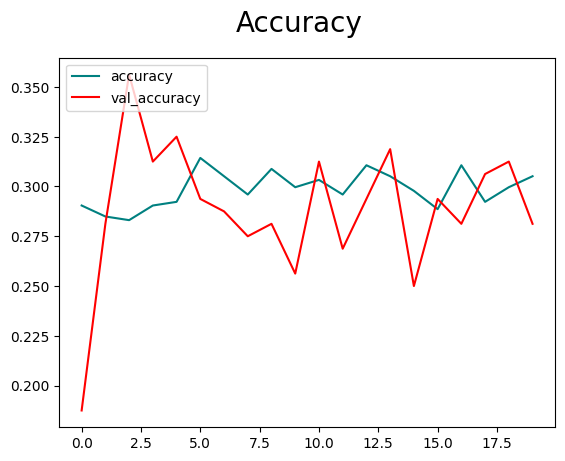

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

**EVALUATE PERFORMANCE**

*Evaluate*

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

3

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 236ms/step


In [ ]:
print(f'Precison : {pre.result().numpy()}, Recall : {re.result().numpy()}, Acccuracy : {acc.result().numpy()}')

Precison : 0.8101266026496887, Recall : 1.0, Acccuracy : 0.2151898741722107


*Test*

<function matplotlib.pyplot.show(close=None, block=None)>

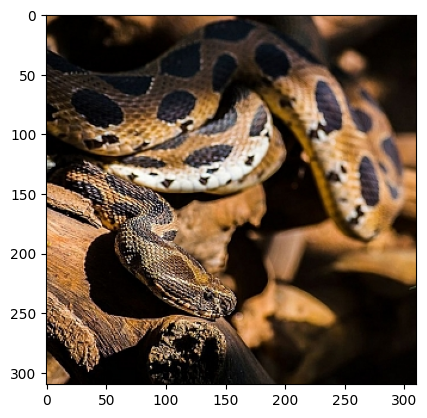

In [ ]:
img = cv2.imread('/content/drive/MyDrive/the-russells-viper.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

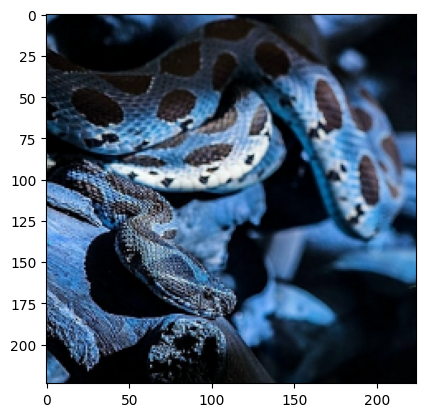

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0)

array([[[[6.97778473e+01, 1.28777832e+02, 1.78777847e+02],
         [5.95044632e+01, 1.18283363e+02, 1.67928574e+02],
         [5.76408272e+01, 1.15297073e+02, 1.64312500e+02],
         ...,
         [9.90381241e+00, 1.29038124e+01, 1.69038124e+01],
         [9.00001335e+00, 1.19186010e+01, 1.59186010e+01],
         [5.46871901e+00, 8.43186474e+00, 1.24318647e+01]],

        [[6.56892700e+01, 1.24002831e+02, 1.75044067e+02],
         [5.92391968e+01, 1.15935631e+02, 1.66755768e+02],
         [5.49931450e+01, 1.09328781e+02, 1.58961899e+02],
         ...,
         [2.27836514e+00, 5.27836514e+00, 9.27836514e+00],
         [3.29855013e+00, 6.11868477e+00, 1.01186848e+01],
         [4.53247845e-01, 3.37182522e+00, 7.37182522e+00]],

        [[6.55742798e+01, 1.22238243e+02, 1.73270706e+02],
         [5.83989563e+01, 1.11222023e+02, 1.61669266e+02],
         [5.32057343e+01, 9.96830444e+01, 1.46920883e+02],
         ...,
         [3.92772818e+00, 6.92772818e+00, 1.09277287e+01],
         [

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5 and yhat < 1:
  print("It is a common rat snake.")
elif yhat > 1 and yhat < 2:
  print("It is a Russel's Viper")
elif yhat > 2 and yhat < 3:
  print("It is a Boiga Forestani")
else :
  print("It is a Green Pit Viper")

It is a Green Pit Viper
